In [153]:
# Import Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from prophet import Prophet
# Statsmodels widely known for forecasting than Prophet
import statsmodels.api as sm
from scipy import stats
# from pandas.core import datetools
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# plt.style.available
plt.style.use("seaborn-whitegrid")

In [154]:
# df = yf.download("EURUSD=X", period="2y", interval="1h")
df = utility.collect_yf("EURUSD", '2y', '1d').rename(columns={"datetime":"date"})
# df = yf.download("EURUSD=X", period="14d", interval="1h")

[*********************100%***********************]  1 of 1 completed


In [155]:
df.head()

,date,open,high,low,close,adj close
0,2021-06-16 01:00:00,1.212547,1.213499,1.211035,1.212709,1.212709
1,2021-06-17 01:00:00,1.199185,1.200769,1.190703,1.199559,1.199559
2,2021-06-18 01:00:00,1.191327,1.192748,1.185115,1.191341,1.191341
3,2021-06-21 01:00:00,1.186901,1.192051,1.184876,1.187366,1.187366
4,2021-06-22 01:00:00,1.191157,1.191753,1.188241,1.191256,1.191256


In [156]:
df.loc[:, 'date'] = pd.to_datetime(df.loc[:,'date'], format="%Y/%m/%d")

In [157]:
amzn_df = df.copy()
amzn_df['volume'] = 0

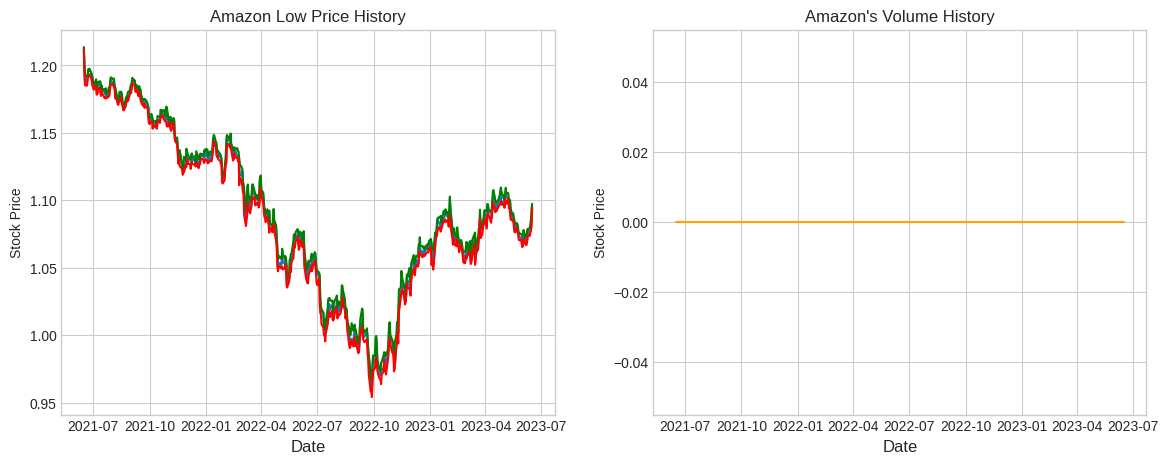

In [158]:
# Simple plotting of Amazon Stock Price
# First Subplot
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
ax1.plot(amzn_df["date"], amzn_df["close"])
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon Close Price History")

# Second Subplot
ax1.plot(amzn_df["date"], amzn_df["high"], color="green")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon High Price History")

# Third Subplot
ax1.plot(amzn_df["date"], amzn_df["low"], color="red")
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Stock Price")
ax1.set_title("Amazon Low Price History")

# Fourth Subplot
ax2.plot(amzn_df["date"], amzn_df["volume"], color="orange")
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Stock Price")
ax2.set_title("Amazon's Volume History")
plt.show()

In [159]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj close'], dtype='object')

In [160]:
m = Prophet()

# Drop the columns
ph_df = amzn_df.drop(['open', 'high', 'low','volume', 'adj close'], axis=1)
ph_df.rename(columns={'close': 'y', 'date': 'ds'}, inplace=True)

ph_df.head()

,ds,y
0,2021-06-16 01:00:00,1.212709
1,2021-06-17 01:00:00,1.199559
2,2021-06-18 01:00:00,1.191341
3,2021-06-21 01:00:00,1.187366
4,2021-06-22 01:00:00,1.191256


In [161]:
m.fit(ph_df)

15:02:04 - cmdstanpy - INFO - Chain [1] start processing
15:02:05 - cmdstanpy - INFO - Chain [1] done processing


In [162]:
# Create Future dates
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
883,2024-06-11 01:00:00,0.913987,0.518255,1.308502
884,2024-06-12 01:00:00,0.912859,0.516674,1.307632
885,2024-06-13 01:00:00,0.912861,0.511481,1.308043
886,2024-06-14 01:00:00,0.911666,0.506646,1.309918
887,2024-06-15 01:00:00,0.944159,0.535379,1.344215
